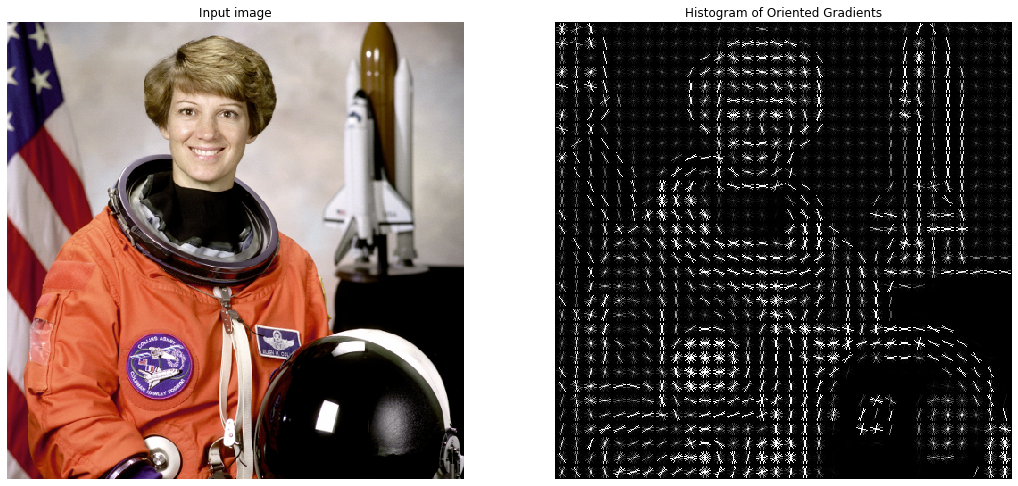

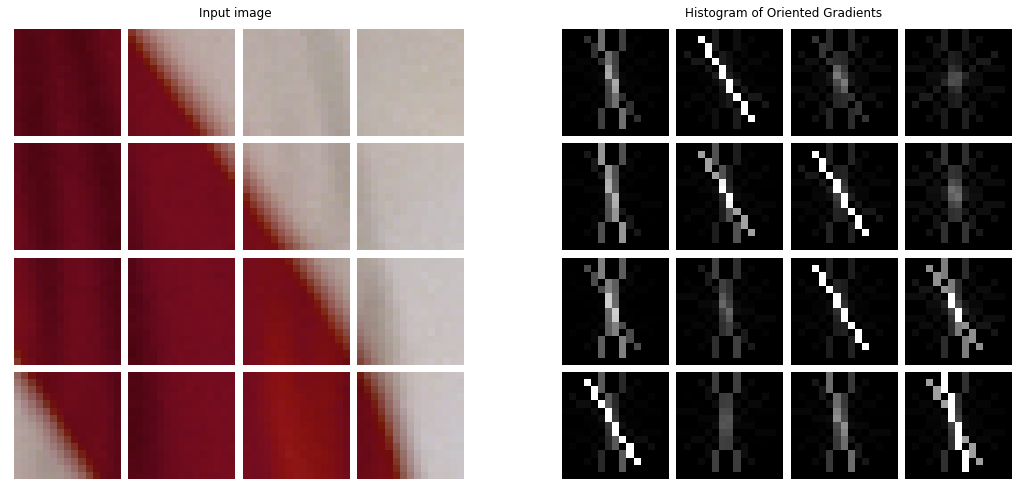

In [1]:
import matplotlib.pyplot as plt

from skimage import color
from skimage.feature import hog
from skimage import data, exposure

%matplotlib inline

#################################################################################################
# Adapted from: http://scikit-image.org/docs/dev/auto_examples/features_detection/plot_hog.html #
#################################################################################################

image = data.astronaut()

cell_size = (16, 16)

fd, hog_image = hog(image, orientations=8, pixels_per_cell=cell_size, cells_per_block=(1, 1), visualize=True, multichannel=True)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 9), sharex=True, sharey=True)

ax1.axis('off')
ax1.imshow(image, cmap=plt.cm.gray)
ax1.set_title('Input image')

# Rescale histogram for better display
hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))

ax2.axis('off')
ax2.imshow(hog_image_rescaled, cmap=plt.cm.gray)
ax2.set_title('Histogram of Oriented Gradients')

plt.show()

# patch = (0, 32, 0, 32)
patch = (128, 192, 32, 96)

patch_img = image[patch[0]:patch[1], patch[2]:patch[3]]
patch_hog = hog_image_rescaled[patch[0]:patch[1], patch[2]:patch[3]]

for i in range(0, patch[1] - patch[0], cell_size[0]):
    patch_img[i, :, :] = 255
    patch_hog[i, :] = 1.0

for j in range(0, patch[3] - patch[2], cell_size[1]):
    patch_img[:, j, :] = 255
    patch_hog[:, j] = 1.0

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 9), sharex=True, sharey=True)

ax1.axis('off')
ax1.imshow(patch_img, cmap=plt.cm.gray)
ax1.set_title('Input image')

ax2.axis('off')
ax2.imshow(patch_hog, cmap=plt.cm.gray)
ax2.set_title('Histogram of Oriented Gradients')

plt.show()

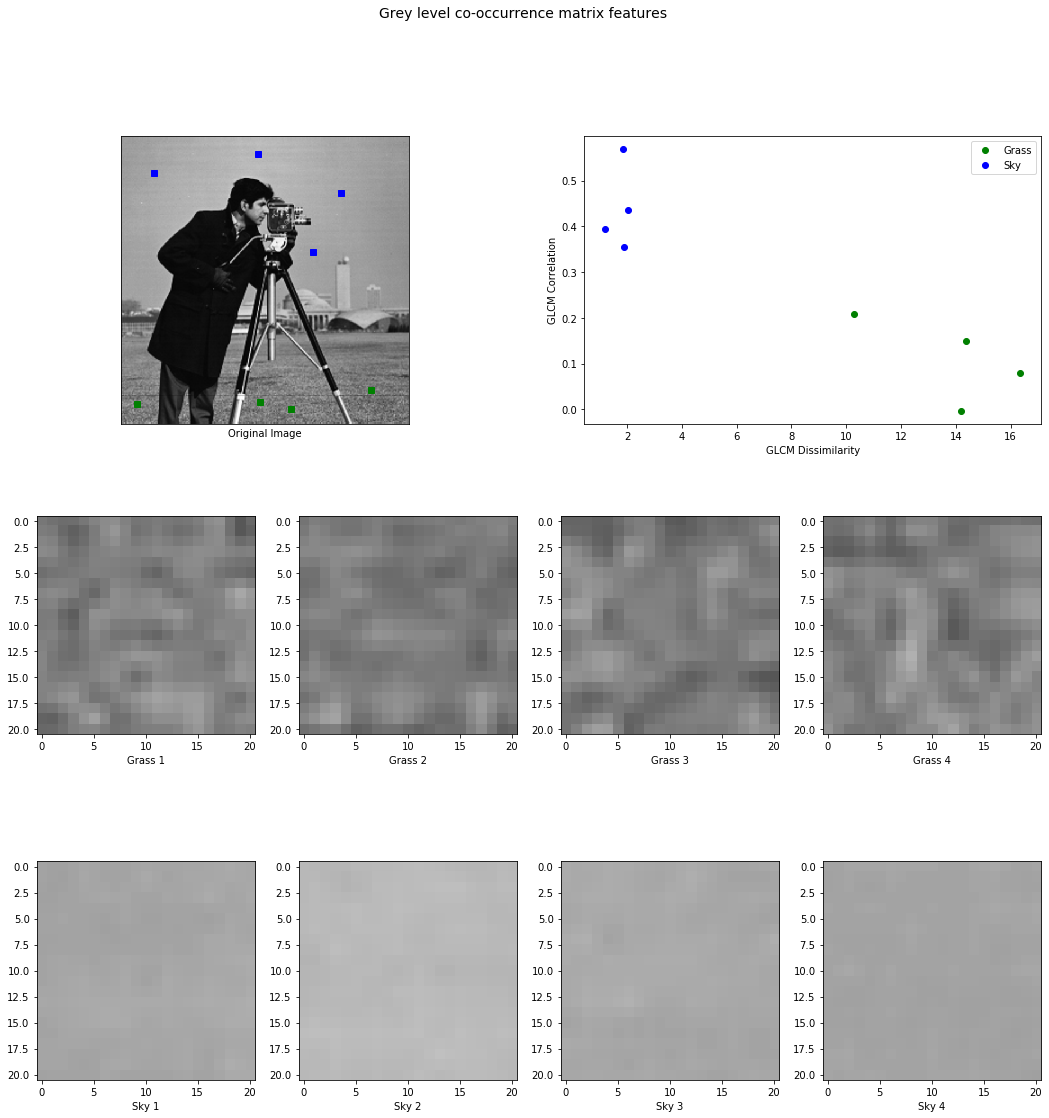

In [2]:
import matplotlib.pyplot as plt

from skimage.feature import greycomatrix, greycoprops
from skimage import data

%matplotlib inline

##################################################################################################
# Adapted from: http://scikit-image.org/docs/dev/auto_examples/features_detection/plot_glcm.html #
##################################################################################################

PATCH_SIZE = 21

# open the camera image
image = data.camera()

# select some patches from grassy areas of the image
grass_locations = [(474, 291), (440, 433), (466, 18), (462, 236)]
grass_patches = []
for loc in grass_locations:
    grass_patches.append(image[loc[0]:loc[0] + PATCH_SIZE,
                               loc[1]:loc[1] + PATCH_SIZE])

# select some patches from sky areas of the image
sky_locations = [(54, 48), (21, 233), (90, 380), (195, 330)]
sky_patches = []
for loc in sky_locations:
    sky_patches.append(image[loc[0]:loc[0] + PATCH_SIZE,
                             loc[1]:loc[1] + PATCH_SIZE])

# compute some GLCM properties each patch
xs = []
ys = []
for patch in (grass_patches + sky_patches):
    glcm = greycomatrix(patch, [5], [0], 256, symmetric=True, normed=True)
    xs.append(greycoprops(glcm, 'dissimilarity')[0, 0])
    ys.append(greycoprops(glcm, 'correlation')[0, 0])

# create the figure
fig = plt.figure(figsize=(18, 18))

# display original image with locations of patches
ax = fig.add_subplot(3, 2, 1)
ax.imshow(image, cmap=plt.cm.gray, interpolation='nearest',
          vmin=0, vmax=255)
for (y, x) in grass_locations:
    ax.plot(x + PATCH_SIZE / 2, y + PATCH_SIZE / 2, 'gs')
for (y, x) in sky_locations:
    ax.plot(x + PATCH_SIZE / 2, y + PATCH_SIZE / 2, 'bs')
ax.set_xlabel('Original Image')
ax.set_xticks([])
ax.set_yticks([])
ax.axis('image')

# for each patch, plot (dissimilarity, correlation)
ax = fig.add_subplot(3, 2, 2)
ax.plot(xs[:len(grass_patches)], ys[:len(grass_patches)], 'go',
        label='Grass')
ax.plot(xs[len(grass_patches):], ys[len(grass_patches):], 'bo',
        label='Sky')
ax.set_xlabel('GLCM Dissimilarity')
ax.set_ylabel('GLCM Correlation')
ax.legend()

# display the image patches
for i, patch in enumerate(grass_patches):
    ax = fig.add_subplot(3, len(grass_patches), len(grass_patches)*1 + i + 1)
    ax.imshow(patch, cmap=plt.cm.gray, interpolation='nearest',
              vmin=0, vmax=255)
    ax.set_xlabel('Grass %d' % (i + 1))

for i, patch in enumerate(sky_patches):
    ax = fig.add_subplot(3, len(sky_patches), len(sky_patches)*2 + i + 1)
    ax.imshow(patch, cmap=plt.cm.gray, interpolation='nearest',
              vmin=0, vmax=255)
    ax.set_xlabel('Sky %d' % (i + 1))


# display the patches and plot
fig.suptitle('Grey level co-occurrence matrix features', fontsize=14)
plt.show()

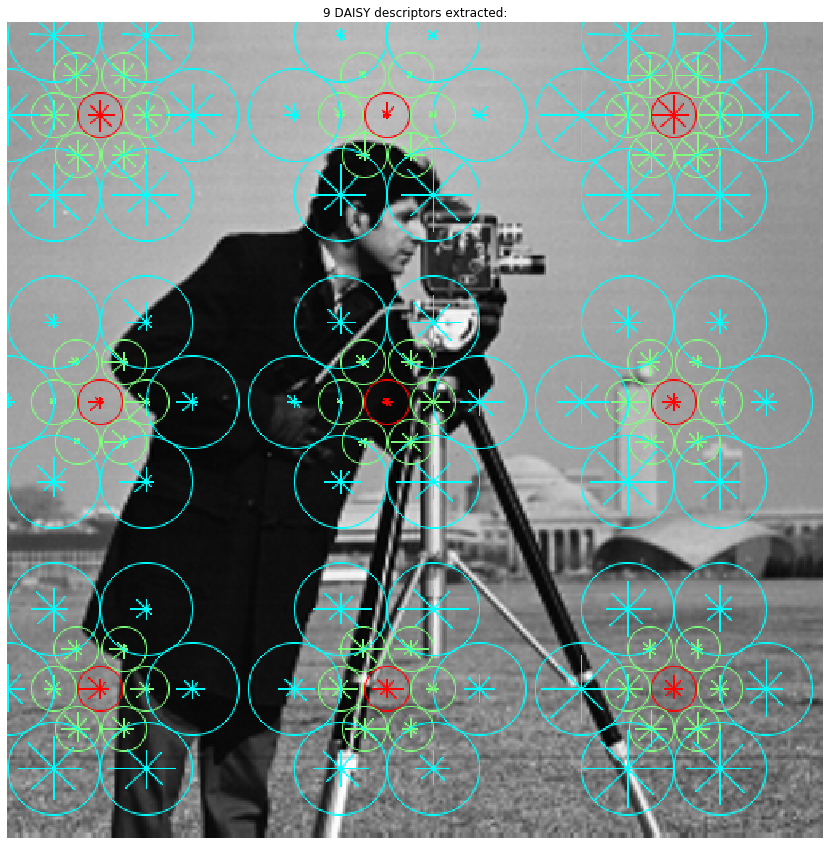

In [3]:
from skimage.feature import daisy
from skimage import data

import matplotlib.pyplot as plt

%matplotlib inline

###################################################################################################
# Adapted from: http://scikit-image.org/docs/dev/auto_examples/features_detection/plot_daisy.html #
###################################################################################################

img = data.camera()
descs, descs_img = daisy(img, step=180, radius=58, rings=2, histograms=6,
                         orientations=8, visualize=True)

fig, ax = plt.subplots(figsize=(15, 15))
ax.axis('off')
ax.imshow(descs_img)
descs_num = descs.shape[0] * descs.shape[1]
ax.set_title('%i DAISY descriptors extracted:' % descs_num)
plt.show()

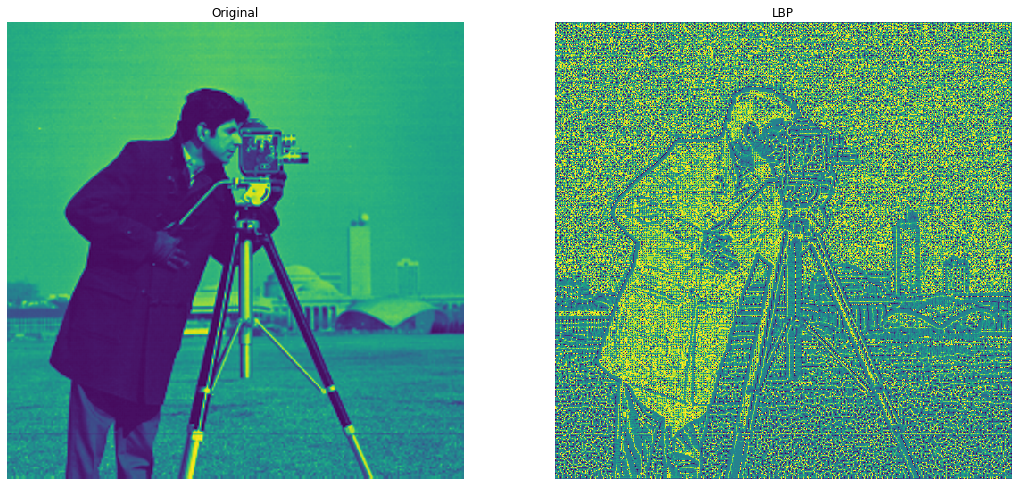

In [4]:
import numpy as np
import matplotlib.pyplot as plt

from skimage import feature
from skimage import data

%matplotlib inline

img = data.camera()

lbp = feature.local_binary_pattern(img, 8, 1, method = 'uniform')

fig, ax = plt.subplots(1, 2, figsize=(18, 10))

ax[0].axis('off')
ax[0].imshow(img)
ax[0].set_title('Original')

ax[1].axis('off')
ax[1].imshow(lbp)
ax[1].set_title('LBP')

plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:25: UserWarning: This function is deprecated and will be removed in 0.18. Use `skimage.io.load` or `imageio.imread` directly.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:32: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.


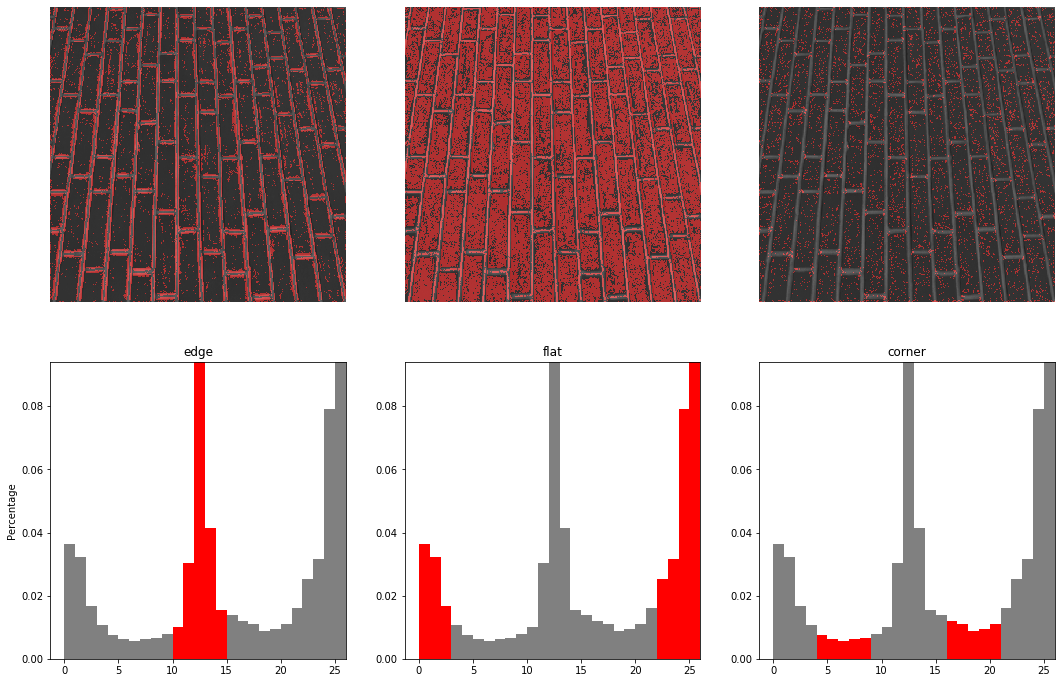

In [5]:
from skimage.transform import rotate
from skimage.feature import local_binary_pattern
from skimage import data
from skimage.color import label2rgb

##################################################################################################################
# Adapted from: http://scikit-image.org/docs/dev/auto_examples/features_detection/plot_local_binary_pattern.html #
##################################################################################################################

# settings for LBP
radius = 3
n_points = 8 * radius


def overlay_labels(image, lbp, labels):
    mask = np.logical_or.reduce([lbp == each for each in labels])
    return label2rgb(mask, image=image, bg_label=0, alpha=0.5)


def highlight_bars(bars, indexes):
    for i in indexes:
        bars[i].set_facecolor('r')


image = data.load('brick.png')
lbp = local_binary_pattern(image, n_points, radius,  method = 'uniform')


def hist(ax, lbp):
    n_bins = int(lbp.max() + 1)
    return ax.hist(lbp.ravel(), normed=True, bins=n_bins, range=(0, n_bins),
                   facecolor='0.5')


# plot histograms of LBP of textures
fig, (ax_img, ax_hist) = plt.subplots(nrows=2, ncols=3, figsize=(18, 12))
plt.gray()

titles = ('edge', 'flat', 'corner')
w = width = radius - 1
edge_labels = range(n_points // 2 - w, n_points // 2 + w + 1)
flat_labels = list(range(0, w + 1)) + list(range(n_points - w, n_points + 2))
i_14 = n_points // 4            # 1/4th of the histogram
i_34 = 3 * (n_points // 4)      # 3/4th of the histogram
corner_labels = (list(range(i_14 - w, i_14 + w + 1)) +
                 list(range(i_34 - w, i_34 + w + 1)))

label_sets = (edge_labels, flat_labels, corner_labels)

for ax, labels in zip(ax_img, label_sets):
    ax.imshow(overlay_labels(image, lbp, labels))

for ax, labels, name in zip(ax_hist, label_sets, titles):
    counts, _, bars = hist(ax, lbp)
    highlight_bars(bars, labels)
    ax.set_ylim(ymax=np.max(counts[:-1]))
    ax.set_xlim(xmax=n_points + 2)
    ax.set_title(name)

ax_hist[0].set_ylabel('Percentage')
for ax in ax_img:
    ax.axis('off')